# **Análise de Dados Após Respetivo Tratamento**

## Imports

Accuracy de 0.90 com um desvio padrão de 0.01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           1206 non-null   object 
 1   magnitude_of_delay  1206 non-null   object 
 2   delay_in_seconds    1206 non-null   int64  
 3   affected_roads      1184 non-null   object 
 4   record_date         1206 non-null   object 
 5   luminosity          1206 non-null   object 
 6   avg_temperature     1206 non-null   float64
 7   avg_atm_pressure    1206 non-null   float64
 8   avg_humidity        1206 non-null   float64
 9   avg_wind_speed      1206 non-null   float64
 10  avg_precipitation   1206 non-null   float64
 11  avg_rain            1206 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 113.2+ KB


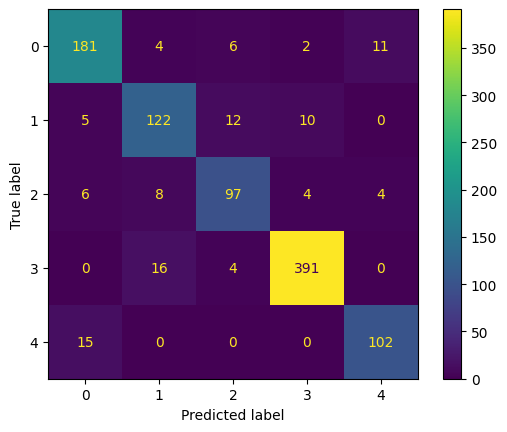

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from ipynb.fs.full.decision_tree import decision_tree_data_preparation

# matplotlib inline

## Carregar os Dataset de Treino e de Teste

In [2]:
TRAINING_DATASET_SOURCE = 'training_data.csv'
TEST_DATASET_SOURCE = 'test_data.csv'

In [3]:
train_df = pd.read_csv(TRAINING_DATASET_SOURCE)
test_df = pd.read_csv(TEST_DATASET_SOURCE)

## Aplicar Tratamento de Dados

In [4]:
prep_df = decision_tree_data_preparation(train_df)

## Exploração dos Dados 

In [5]:
prep_df.head()
prep_df.describe()
prep_df.info()

,affected_roads,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,incidents,rain_level,luminosity_binned,hour,day,month,weekday,weekend,holiday,delay_in_minutes
0,0,12.0,1013.0,70.0,1.0,None,0.0,2.0,5,15,3,0,0,0,0.000000
1,1,12.0,1007.0,91.0,1.0,None,0.0,2.0,4,25,12,5,1,1,0.106944
2,0,14.0,1025.0,64.0,0.0,Low,0.0,1.0,4,12,3,4,0,0,0.019167
3,3,15.0,1028.0,75.0,1.0,Very_High,0.0,1.0,2,29,9,2,0,0,0.638056
4,1,27.0,1020.0,52.0,1.0,High,0.0,1.0,2,13,6,6,1,0,0.000000


,affected_roads,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,rain_level,luminosity_binned,hour,day,month,weekday,weekend,holiday,delay_in_minutes
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,1.130400,14.437800,1018.296000,74.571600,1.147500,0.048800,1.460600,3.913000,15.888400,7.131600,2.983600,0.280200,0.04100,0.155713
std,0.813836,4.572648,4.944054,17.005996,1.075791,0.215471,0.568254,1.190846,8.734736,3.442129,1.992015,0.449142,0.19831,0.468572
min,0.000000,1.000000,1005.000000,23.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,11.000000,1015.000000,63.000000,0.000000,0.000000,1.000000,3.000000,8.000000,4.000000,1.000000,0.000000,0.00000,0.000000
50%,1.000000,14.000000,1019.000000,78.000000,1.000000,0.000000,1.000000,4.000000,16.000000,7.000000,3.000000,0.000000,0.00000,0.000000
75%,1.000000,17.000000,1022.000000,90.000000,2.000000,0.000000,2.000000,5.000000,23.000000,10.000000,5.000000,1.000000,0.00000,0.065000
max,8.000000,28.000000,1032.000000,100.000000,4.000000,1.000000,2.000000,5.000000,31.000000,12.000000,6.000000,1.000000,1.00000,8.634167


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   affected_roads     5000 non-null   int64  
 1   avg_temperature    5000 non-null   float64
 2   avg_atm_pressure   5000 non-null   float64
 3   avg_humidity       5000 non-null   float64
 4   avg_wind_speed     5000 non-null   float64
 5   incidents          5000 non-null   object 
 6   rain_level         5000 non-null   float64
 7   luminosity_binned  5000 non-null   float64
 8   hour               5000 non-null   int64  
 9   day                5000 non-null   int64  
 10  month              5000 non-null   int64  
 11  weekday            5000 non-null   int64  
 12  weekend            5000 non-null   int64  
 13  holiday            5000 non-null   int64  
 14  delay_in_minutes   5000 non-null   float64
dtypes: float64(7), int64(7), object(1)
memory usage: 586.1+ KB


- Definição do primeiro e do terceiro quartis
- Definição dos valores máximo (*upper*) e mínimo (*lower*)

In [6]:
numeric_columns = ['affected_roads', 'avg_temperature', 'avg_atm_pressure', 'avg_humidity', 'avg_wind_speed', 'rain_level', 'luminosity_binned', 'hour', 'day', 'month', 'weekday', 'weekend', 'holiday', 'delay_in_minutes']
whiskers = []

for num in numeric_columns:
    Q1 = prep_df[num].quantile(0.25)
    Q3 = prep_df[num].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    whiskers.append((num,lower,upper))

print(whiskers)

[('affected_roads', 1.0, 1.0), ('avg_temperature', 2.0, 26.0), ('avg_atm_pressure', 1004.5, 1032.5), ('avg_humidity', 22.5, 130.5), ('avg_wind_speed', -3.0, 5.0), ('rain_level', 0.0, 0.0), ('luminosity_binned', -0.5, 3.5), ('hour', 0.0, 8.0), ('day', -14.5, 45.5), ('month', -5.0, 19.0), ('weekday', -5.0, 11.0), ('weekend', -1.5, 2.5), ('holiday', 0.0, 0.0), ('delay_in_minutes', -0.0975, 0.1625)]


## Visualização gráfica dos dados

- Matriz de correlação para valores numéricos

/var/folders/8y/y36_lcmn0tq020nptms4sypw0000gn/T/ipykernel_20266/2838167542.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = prep_df.corr()


<AxesSubplot: >

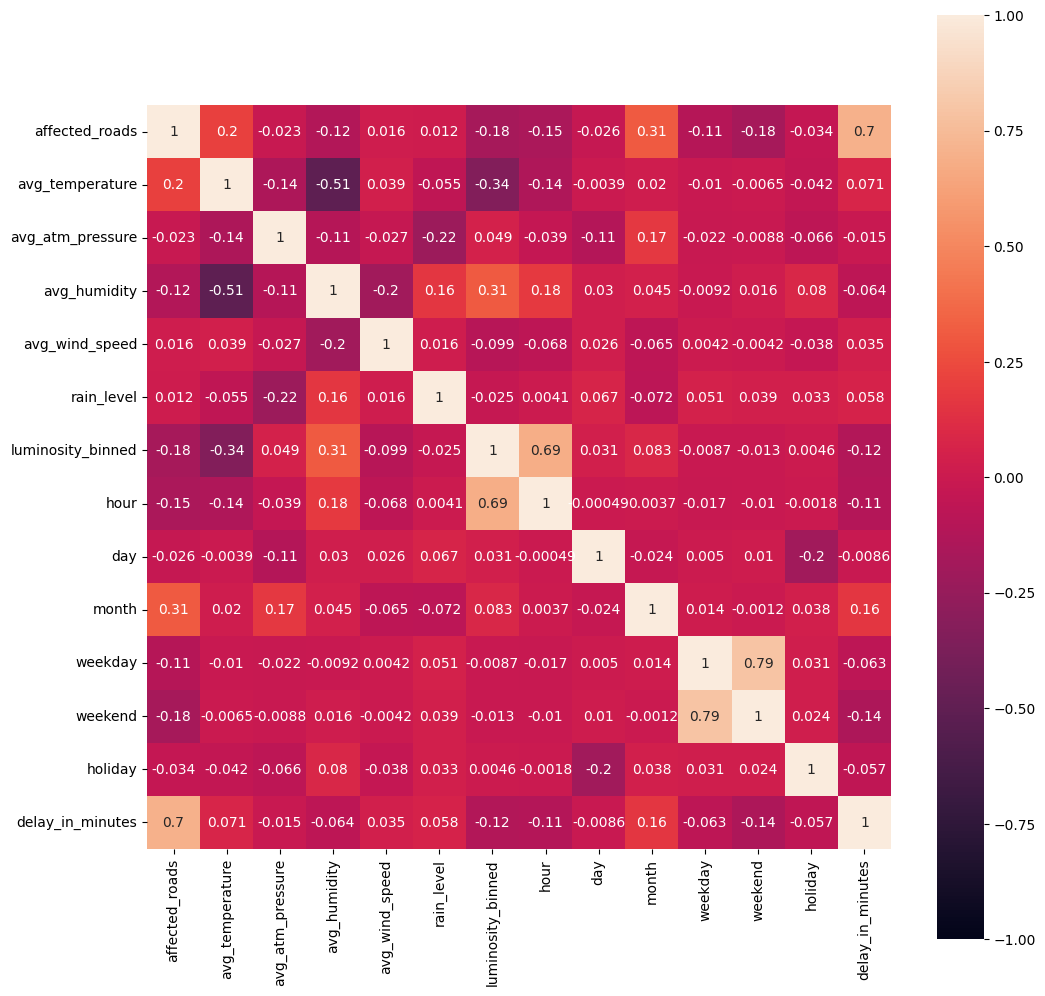

In [7]:
correlationMatrix = prep_df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlationMatrix, vmin=-1, vmax=1, square=True, annot=True)

- Distribuições bivariadas de pares num conjunto de dados

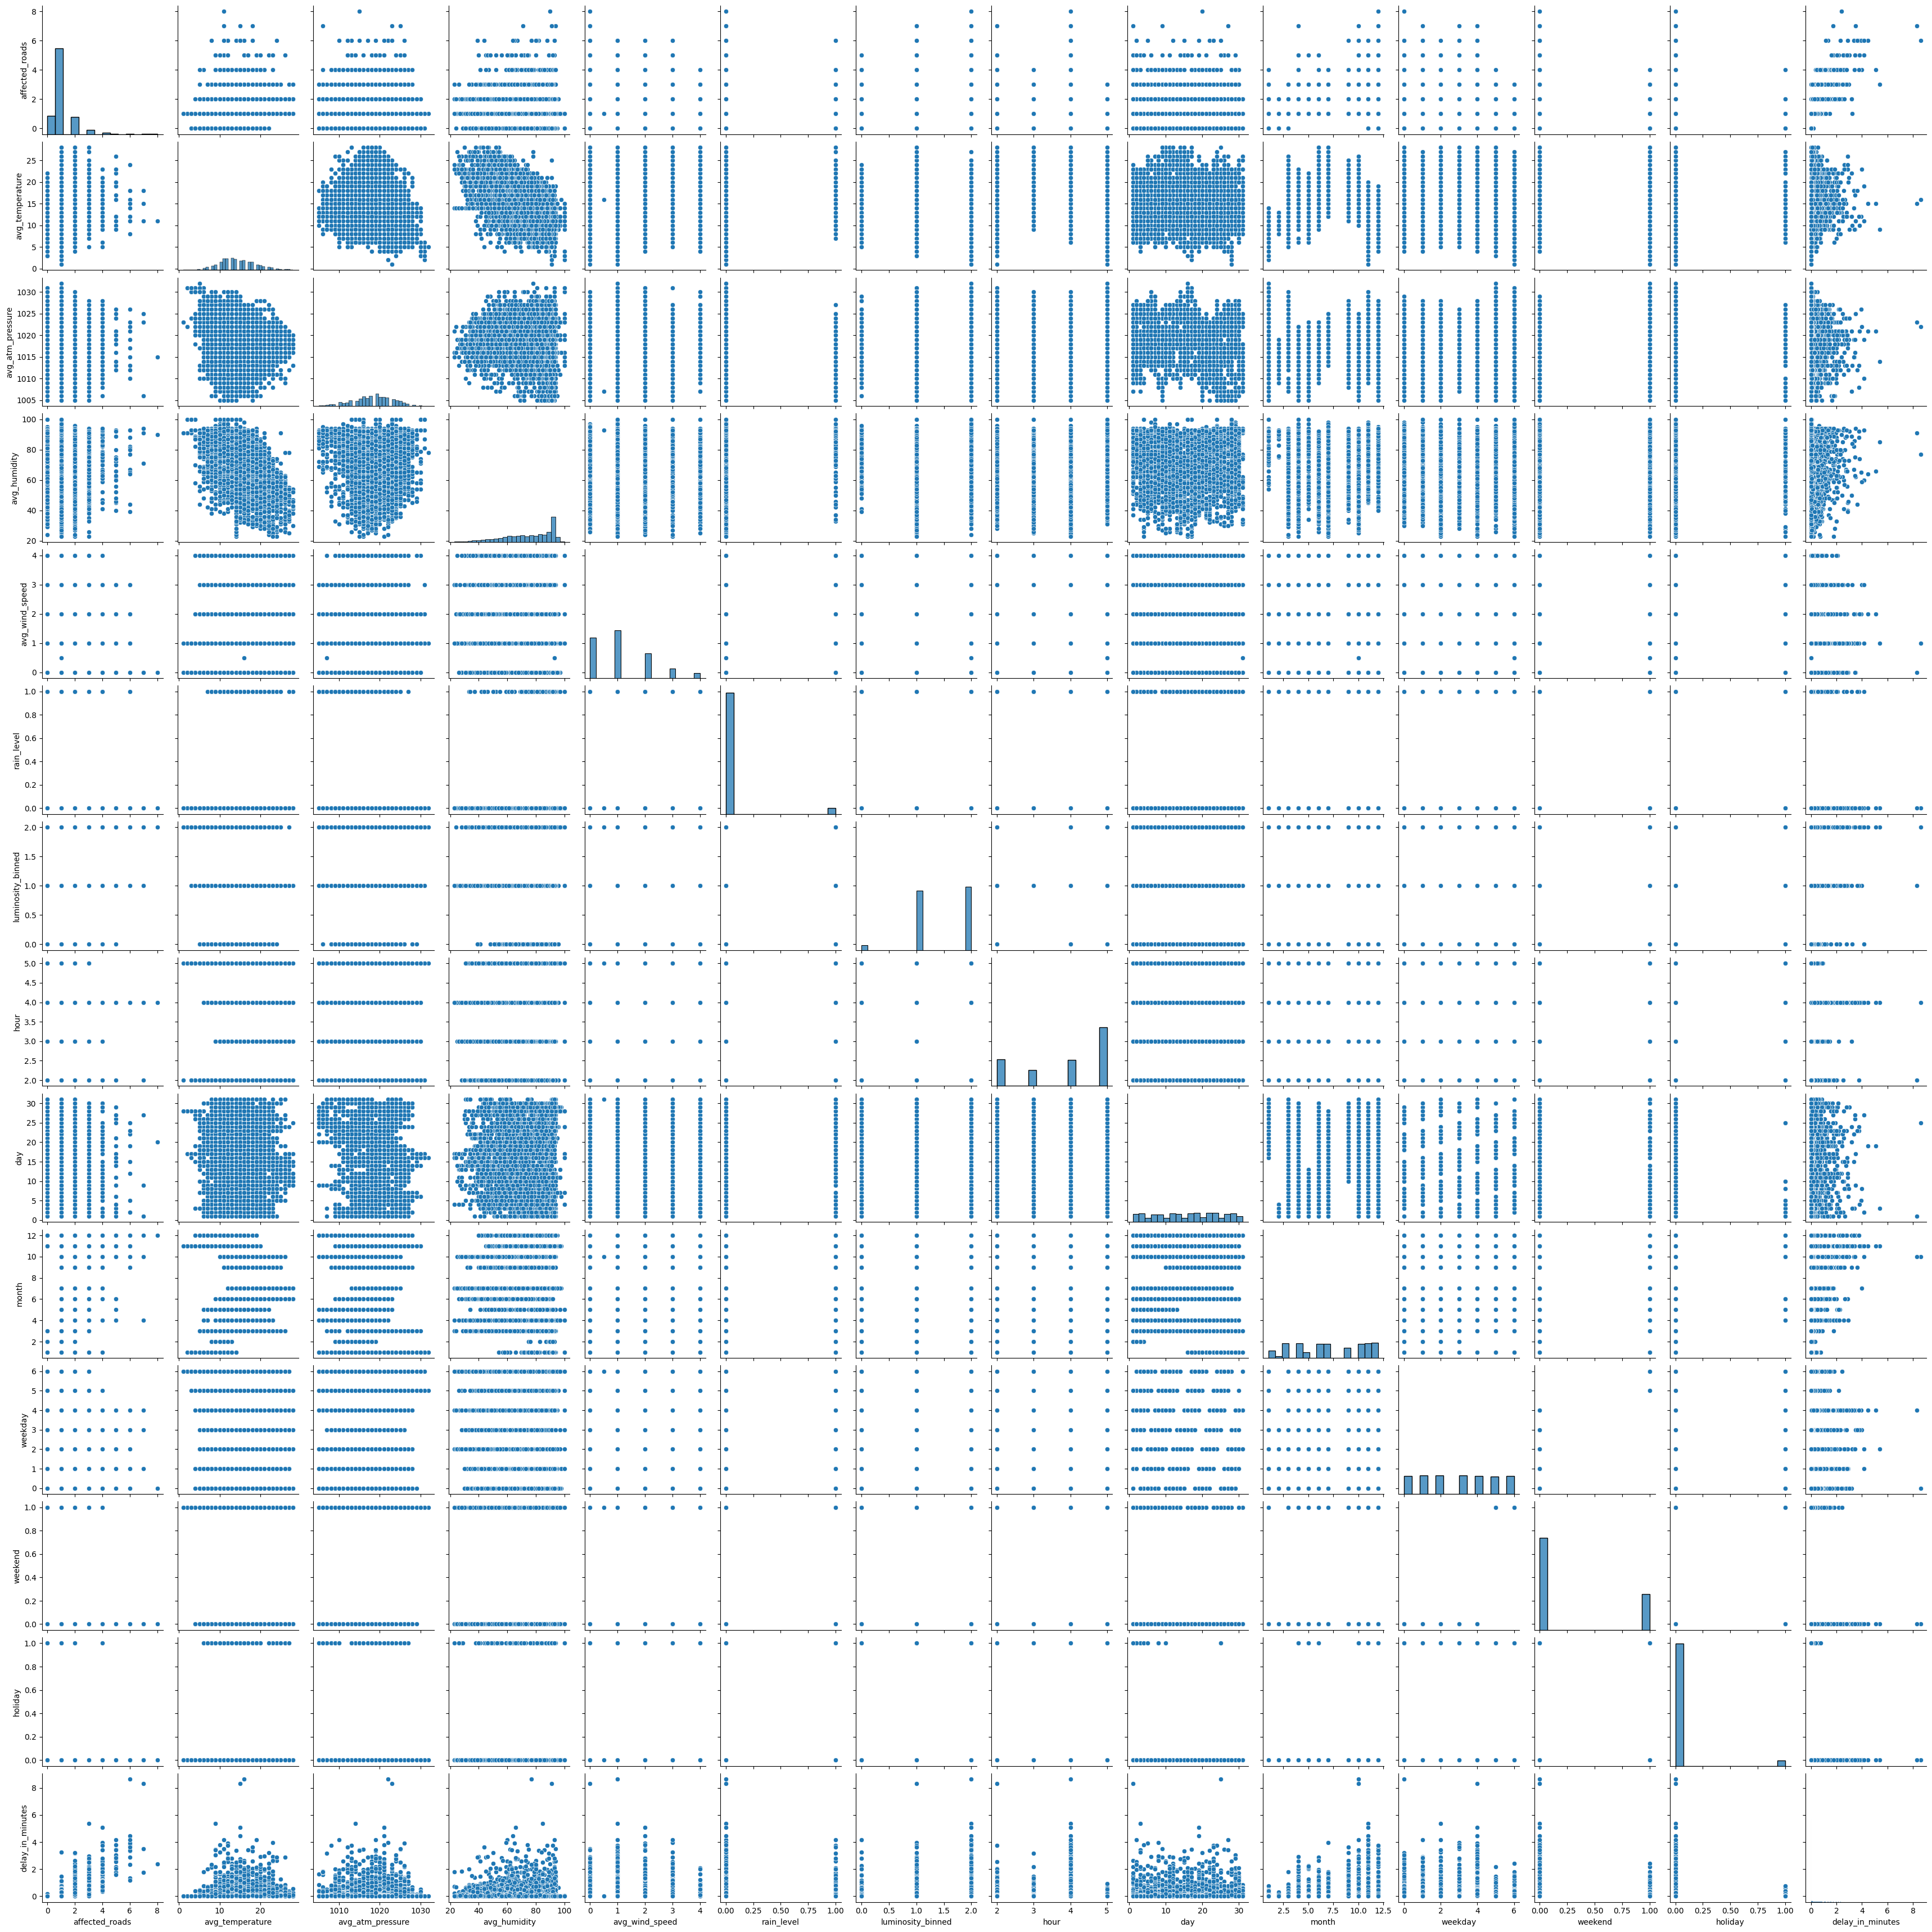

In [8]:
sns.pairplot(prep_df)

- Diagrama de caixa para cada feature numérica

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature affected_roads')

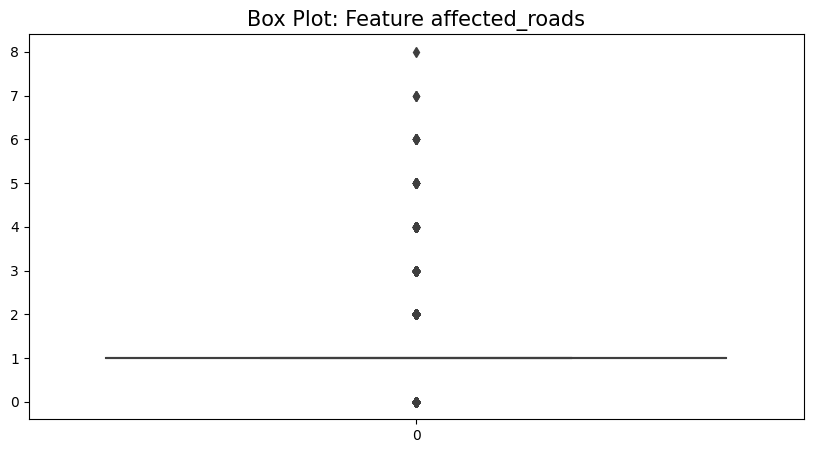

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature avg_temperature')

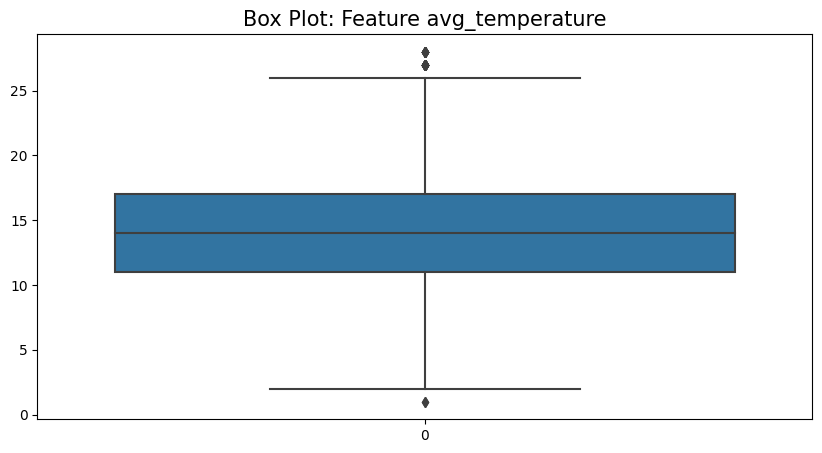

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature avg_atm_pressure')

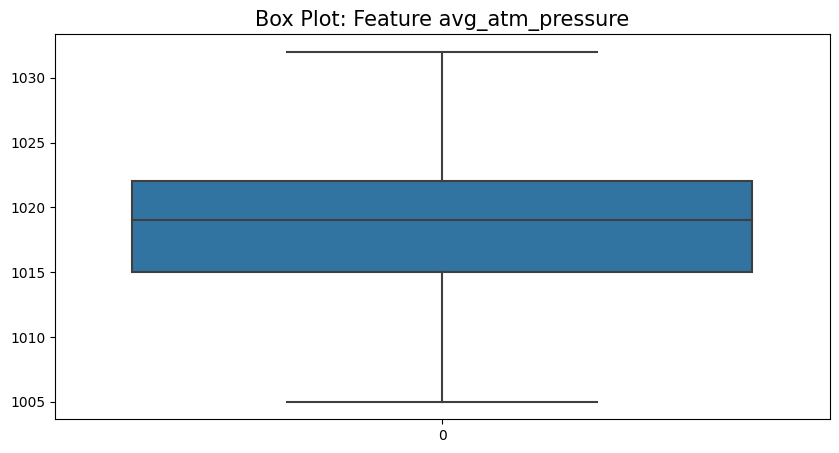

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature avg_humidity')

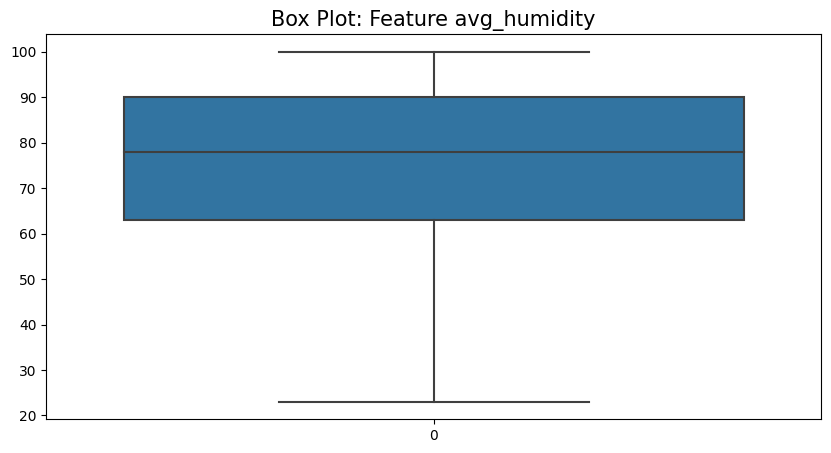

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature avg_wind_speed')

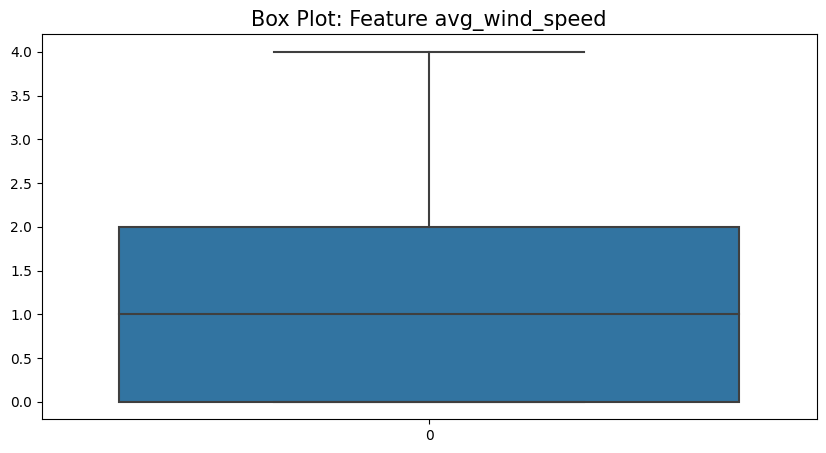

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature rain_level')

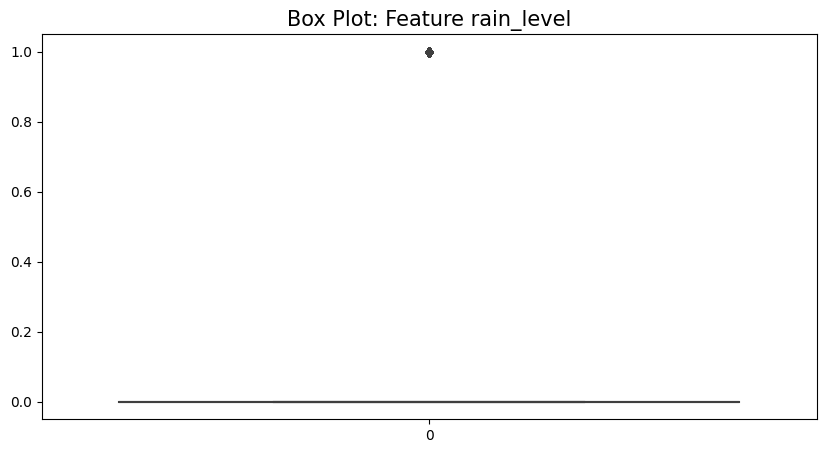

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature luminosity_binned')

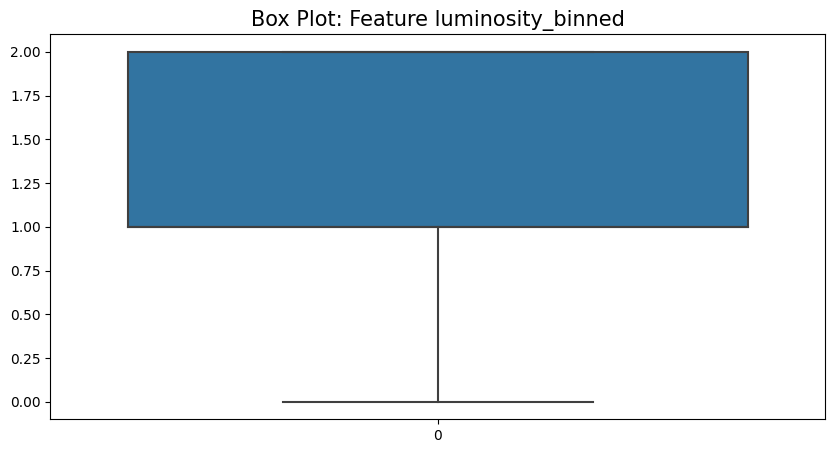

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature hour')

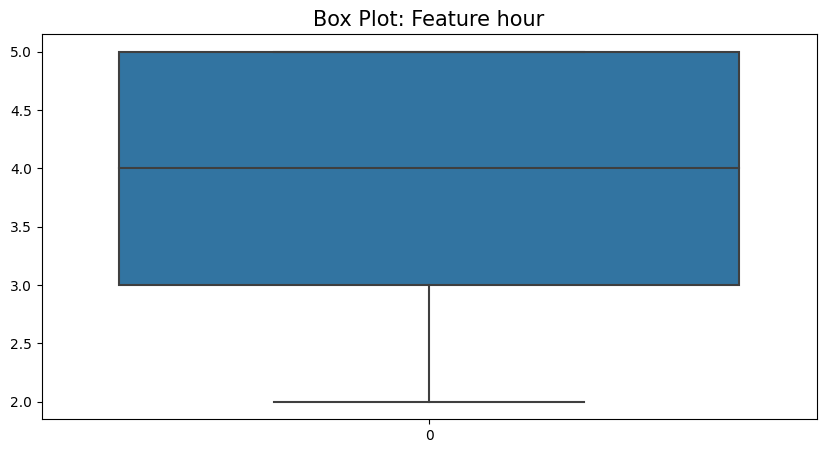

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature day')

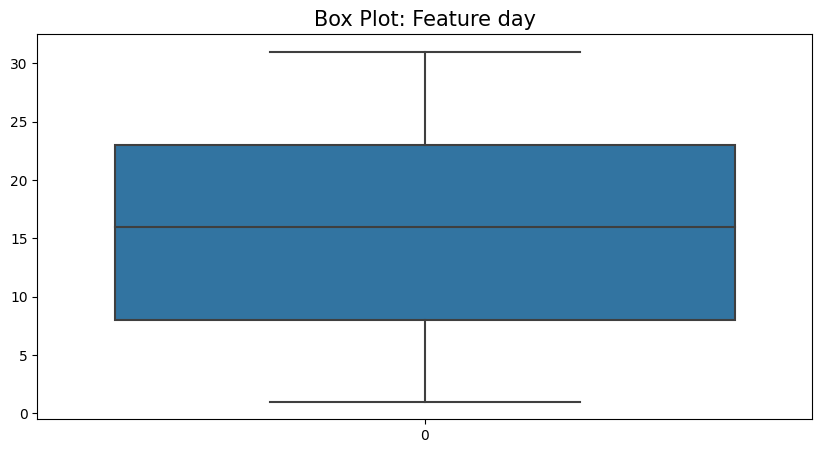

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature month')

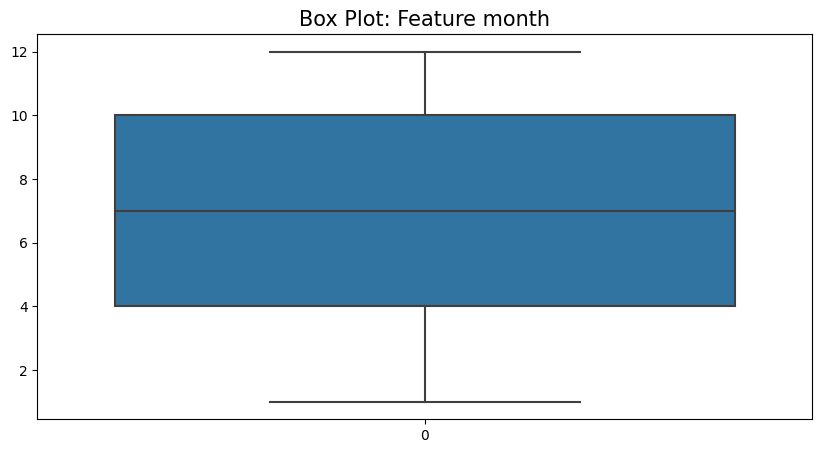

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature weekday')

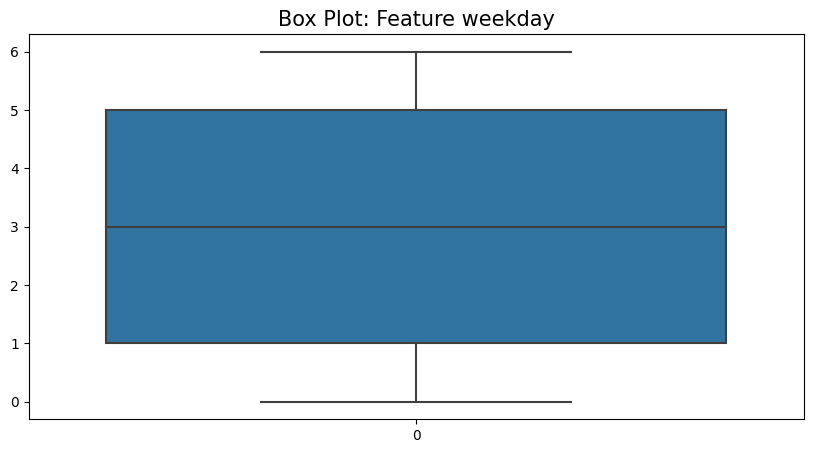

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature weekend')

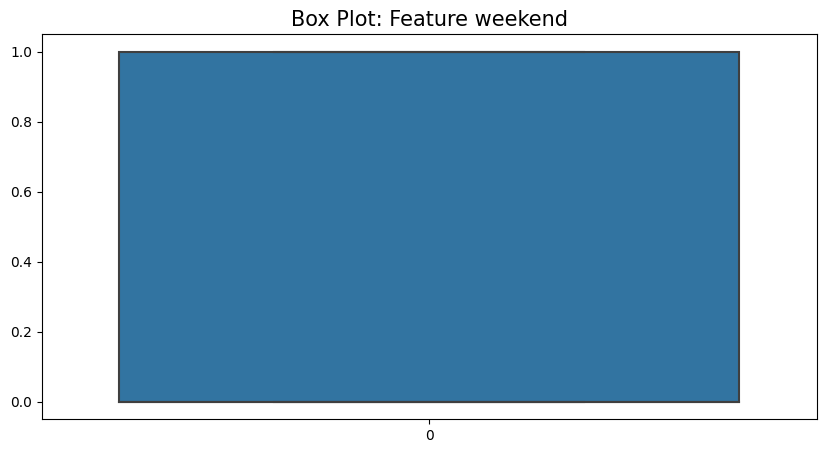

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature holiday')

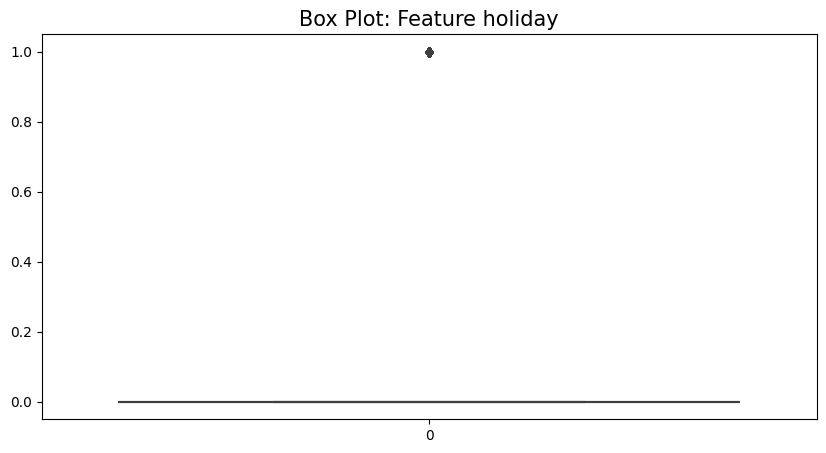

<AxesSubplot: >

Text(0.5, 1.0, 'Box Plot: Feature delay_in_minutes')

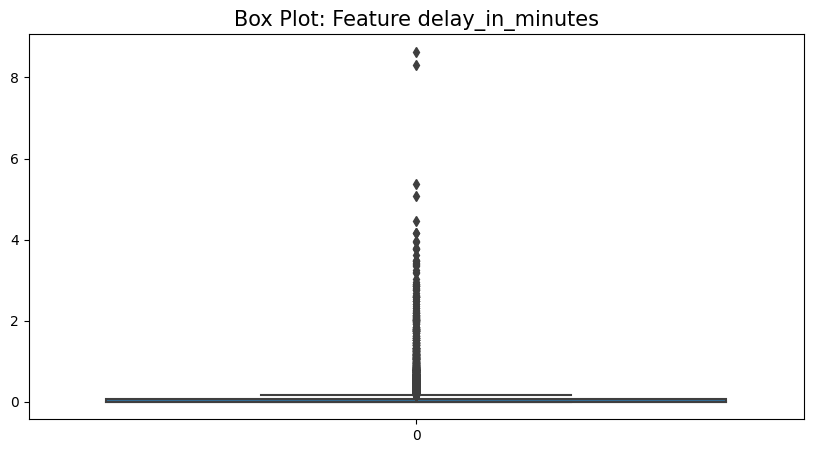

In [9]:
for num in numeric_columns:
    fig = plt.figure(figsize=(10,5))
    sns.boxplot(prep_df[num])
    plt.title('Box Plot: Feature ' + num, fontsize=15)
    plt.show()

- Quantidade de valores nulos em cada feature

<AxesSubplot: >

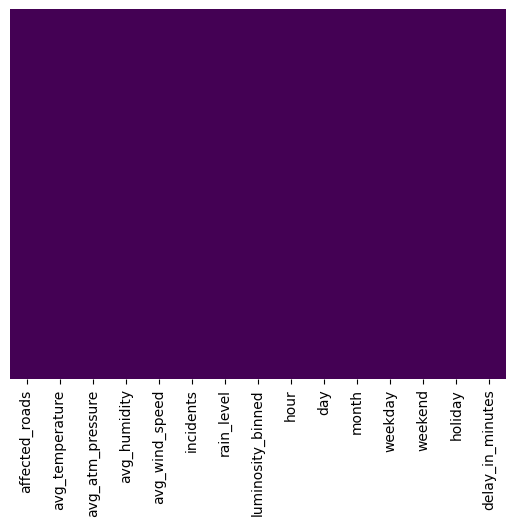

In [10]:
sns.heatmap(prep_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Histograma de um conjunto univariante de observações da feature **incidents** (target)

array(['None', 'Low', 'Very_High', 'High', 'Medium'], dtype=object)

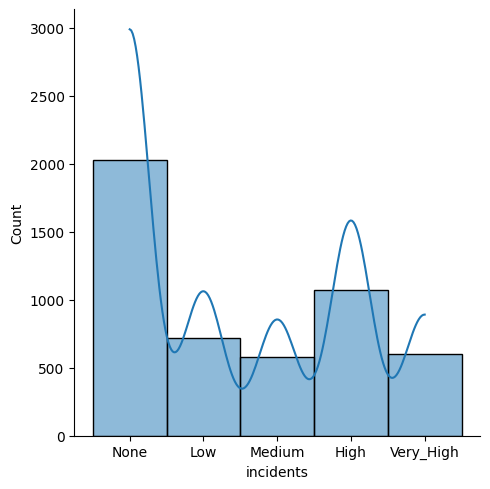

In [11]:
prep_df['incidents'].unique()
prep_df['incidents'] = pd.Categorical(prep_df['incidents'], categories=['None', 'Low', 'Medium', 'High', 'Very_High'])
sns.displot(prep_df['incidents'], kde=True)

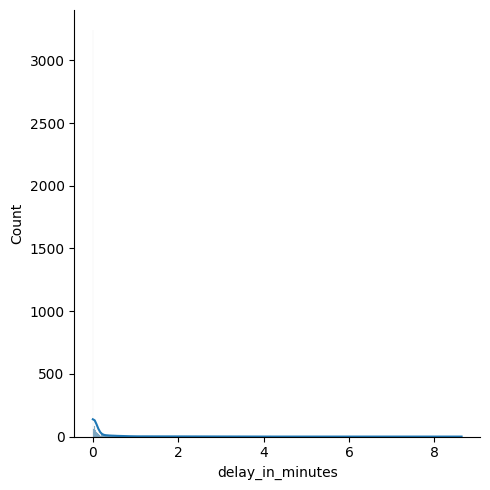

In [13]:
sns.displot(prep_df['delay_in_minutes'], kde=True)